In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [5]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

In [8]:
X_r.shape

(150, 2)

In [9]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit_transform(X,y)

In [10]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Text(0.5, 1.0, 'PCA')

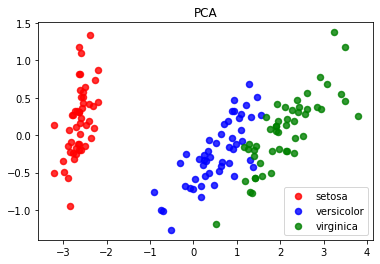

In [15]:
colors = ['red','blue','green']
for color, i, target_name in zip(colors, [0,1,2], target_names):
  plt.scatter(X_r[y==i,0],X_r[y==i,1],color=color, alpha = 0.8, lw = 1.5, label = target_name)
plt.legend(loc = 'best',shadow = False, scatterpoints =1)
plt.title('PCA')

Text(0.5, 1.0, 'PCA')

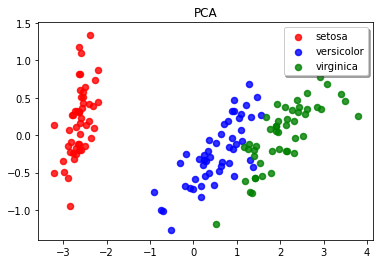

In [18]:
colors = ['red','blue','green']
for color, i, target_name in zip(colors, [0,1,2], target_names):
  plt.scatter(X_r[y==i,0],X_r[y==i,1],color=color, alpha = 0.8, lw = 1.5, label = target_name)
plt.legend(loc = 'upper right',shadow = True, scatterpoints =1)
plt.title('PCA')

Text(0.5, 1.0, 'LDA')

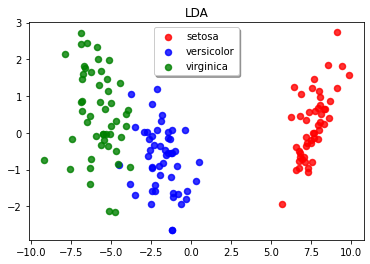

In [19]:
colors = ['red','blue','green']
for color, i, target_name in zip(colors, [0,1,2], target_names):
  plt.scatter(X_r2[y==i,0],X_r2[y==i,1],color=color, alpha = 0.8, lw = 1.5, label = target_name)
plt.legend(loc = 'best',shadow = True, scatterpoints =1)
plt.title('LDA')

In [21]:
from mpl_toolkits import mplot3d
from sklearn import manifold

In [22]:
X,t = datasets.make_swiss_roll(n_samples = 1500)

In [23]:
X.shape

(1500, 3)

In [24]:
t.shape

(1500,)

Text(0.5, 0.92, 'Original data')

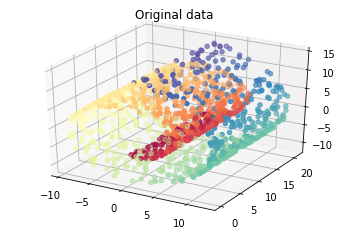

In [25]:
ax = plt.axes(projection = '3d')
ax.scatter(X[:,0],X[:,1],X[:,2], c=t, cmap = plt.cm.Spectral)
ax.set_title("Original data")

In [26]:
mds = manifold.MDS(n_components=2, max_iter = 100)
Y = mds.fit_transform(X)

Text(0.5, 1.0, 'MDS')

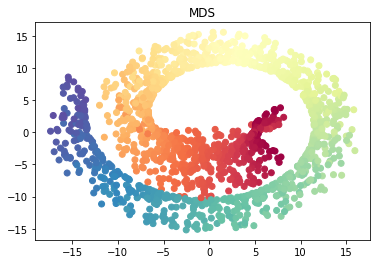

In [28]:
plt.scatter(Y[:, 0],Y[:,1],c=t, cmap=plt.cm.Spectral)
plt.title('MDS')

In [29]:
t

array([13.93032929,  9.22057472, 12.12389783, ..., 13.68177778,
        5.29414476,  6.29914916])

In [31]:
im = manifold.Isomap(n_neighbors=12,n_components=2)

In [33]:
Y = im.fit_transform(X)

Text(0.5, 1.0, 'Isomap')

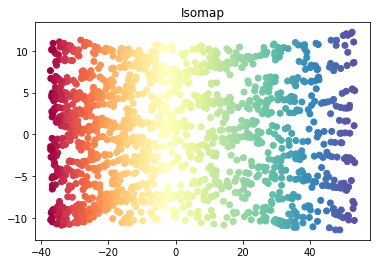

In [34]:
plt.scatter(Y[:,0],Y[:,1],c=t,cmap = plt.cm.Spectral)
plt.title('Isomap')

In [35]:
lle = manifold.LocallyLinearEmbedding(n_neighbors = 12, n_components=2)

In [36]:
Y = lle.fit_transform(X)

Text(0.5, 1.0, 'LLE')

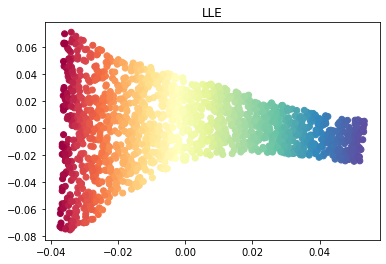

In [37]:
plt.scatter(Y[:,0],Y[:,1],c=t,cmap=plt.cm.Spectral)
plt.title('LLE')

1.IRIS DATA 불러오기
2. petal length, petal width 컬럼으로 시각화
3. 스케일링 후 PCA 변환 수행 pc=3
4. pca 변환된 데이터 컬럼명 pc1 pc2 pc3 로 변환
5. 차원축소 된 데이터로 데이터 시각화 
6. component 변동성 비율 확인 
7. 원본 데이터와 pca 변환된 데이터 기반으로 예측 성능 비교 

In [38]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


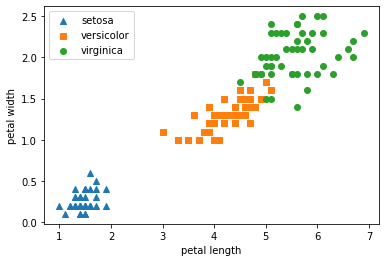

In [39]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['petal_length']
    y_axis_data = irisDF[irisDF['target']==i]['petal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [44]:
iris_scaled.shape

(150, 4)

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 3)


In [46]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pc1','pc2','pc3']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pc1,pc2,pc3,target
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0


In [ ]:
ax = plt.axes(projection = '3d')
ax.scatter(X[:,0],X[:,1],X[:,2], c=t, cmap = plt.cm.Spectral)
ax.set_title("Original data")

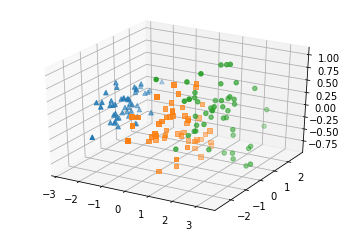

In [50]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']
ax = plt.axes(projection='3d')
#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pc1']   
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pc2']
    z_axis_data = irisDF_pca[irisDF_pca['target']==i]['pc3']
    
    ax.scatter(x_axis_data, y_axis_data,z_axis_data, marker=marker,label=iris.target_names[i])


In [53]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [52]:
_

,pc1,pc2,pc3,target
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [55]:
pca_X = irisDF_pca[['pc1', 'pc2','pc3']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)
print(np.mean(scores_pca))

[0.92 0.92 0.94]
0.9266666666666667


1. IRIS DATA 불러오기
2. petal length, petal width 컬럼으로 시각화
3. 스케일링 후 LDA 변환 수행 c=2
4. l 변환된 데이터 컬럼명 lda1 lda2 lda3 로 변환
5. 차원축소 된 데이터로 데이터 시각화 
6. component 변동성 비율 확인 
7. 원본 데이터와/ pca 변환된 데이터/ lda 성능 비교 

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [65]:
lda = LinearDiscriminantAnalysis(n_components=2)
# fit()호출 시 target값 입력 
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


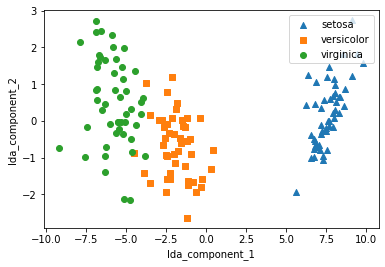

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [67]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [70]:
irisDF_pca.head()

,pc1,pc2,pc3,target
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0
3,-2.299384,-0.597395,0.091290,0
4,-2.389842,0.646835,0.015738,0


In [71]:
pca_X = irisDF_pca[['pc1','pc2']]

scores_pca = cross_val_score(rcf, pca_X,iris.target,scoring = 'accuracy',cv=3)
print(scores_pca)
print(np.mean(scores_pca))

[0.88 0.88 0.88]
0.88


In [72]:
irisDF_lda.head()

,lda_component_1,lda_component_2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0


In [73]:
lda_X = irisDF_lda[['lda_component_1','lda_component_2']]
rcf = RandomForestClassifier(random_state=156)
scores_lda = cross_val_score(rcf, lda_X,iris.target,scoring = 'accuracy',cv=3)
print(scores_lda)
print(np.mean(scores_lda))

[1.   0.9  0.96]
0.9533333333333333
